<a href="https://colab.research.google.com/github/ngtrnghia1205/TGMT/blob/main/30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow
import dlib #   !pip install dlib
from imutils import face_utils

In [17]:
# Kết nối đến Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
path = '/content/drive/MyDrive/test_opencv'
# Hiển thị tất cả thư mục hoặc file
os.listdir(path)

['image_540.jpg', 'image_560.jpg', 'image_600.jpg', 'image_580.jpg', 'models']

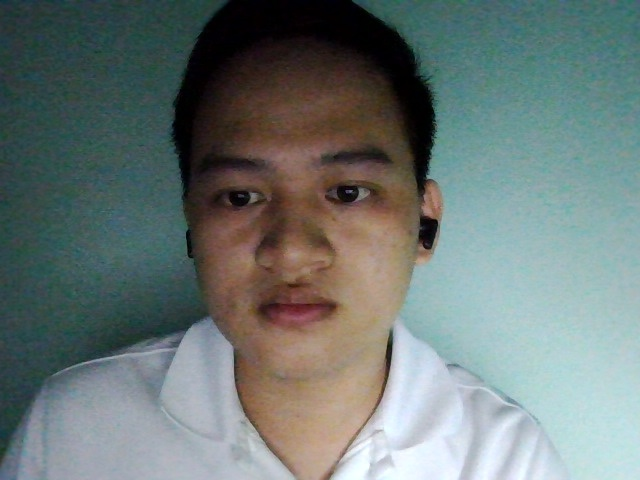

In [19]:
#Hiển thị một ảnh
img = cv2.imread(path + "/image_540.jpg")
cv2_imshow(img)

-0.177809
0.0107048
0.0799561
-0.0659
-0.0601956
-0.0815825
-0.0129029
-0.182674
0.131813
-0.107279
0.280832
-0.0143732
-0.0989153
-0.192383
0.0219532
0.201626
-0.137087
-0.152164
-0.0645169
-0.0588169
0.00725878
-0.0868025
0.0261586
0.0726269
-0.0897706
-0.322185
-0.132866
-0.0794742
0.0439818
-0.00372867
-0.0295073
0.0480366
-0.222219
-0.0735723
-0.0284618
0.0968796
0.0253632
-0.0363913
0.187847
-0.0315621
-0.239926
0.0641796
0.0794859
0.203742
0.151271
0.0861727
0.0108125
-0.0401382
0.105501
-0.183473
0.103856
0.0479348
0.149558
-0.0394127
0.0507033
-0.182179
0.0157007
0.107637
-0.181541
0.0153754
0.00264035
-0.1087
-0.0387708
-0.0831276
0.25236
0.189115
-0.0728664
-0.0976652
0.201209
-0.063546
-0.00629166
0.0590983
-0.141431
-0.145961
-0.373083
0.0603373
0.412573
0.107913
-0.184943
0.0231285
-0.0955995
0.0455891
0.0656343
0.056285
-0.0773699
-0.00165713
-0.111552
-0.0478361
0.158144
0.0138569
-0.021417
0.208228
0.000587966
0.0473987
-0.031599
-0.00414777
-0.040423
0.000242654
-0.11

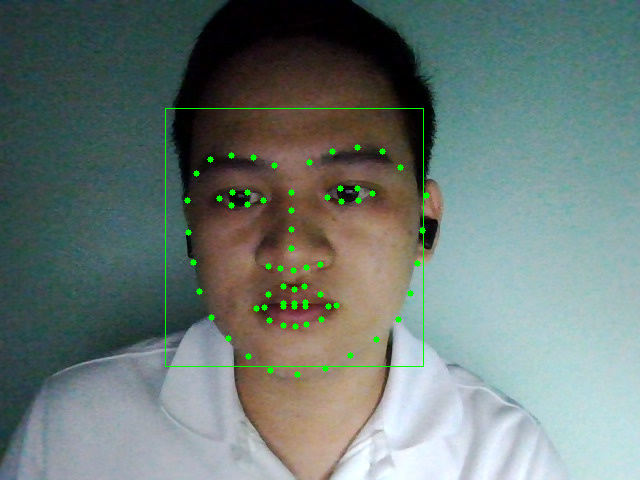

In [21]:
face_landmarks_model_path =  '/content/drive/MyDrive/test_opencv/models/shape_predictor_68_face_landmarks.dat'
face_recognition_model_path = '/content/drive/MyDrive/test_opencv/models/dlib_face_recognition_resnet_model_v1.dat'
img_path = path+  "/image_540.jpg"

# Tạo bộ nhận diện khuôn mặt
face_detector = dlib.get_frontal_face_detector()

# ĐỌc hình ảnh và phát hiện khuôn mặt
img = cv2.imread(img_path)

# Nhận diện các khuôn mặt bên trong ảnh
faces = face_detector(img)

# Vòng lặp qua từng khuôm mặt
for face in faces:
    point_a = face.left(), face.top()
    point_b = face.right(), face.bottom()

    # Phát hiện ra các điểm đặc trưng trên khuôn mặt
    shape_predictor = dlib.shape_predictor(face_landmarks_model_path)
    face_shape = shape_predictor(img, face)
    face_shape_array = face_utils.shape_to_np(face_shape)

     # Tính toán đặc trưng của khuôn mặt
    shape_descriptor = dlib.face_recognition_model_v1(face_recognition_model_path)
    face_descriptors = shape_descriptor.compute_face_descriptor(img, face_shape)
    print(face_descriptors)

     # Vẽ hình chữ nhật và các điểm đặc trưng lên hình ảnh
    cv2.rectangle(img, point_a, point_b, (0,255,0))
    for point in face_shape_array:
        cv2.circle(img, tuple(point), 3, (0, 255, 0), -1)

cv2_imshow(img)

In [15]:
face_landmarks_model_path = path+ "/models/shape_predictor_68_face_landmarks.dat"
print(face_landmarks_model_path)
face_recognition_model_path = path+ "/models/dlib_face_recognition_resnet_model_v1.dat"
print(face_recognition_model_path)
img_path = path+  "/face2.png"

/content/drive/MyDrive/test_opencv/models/shape_predictor_68_face_landmarks.dat
/content/drive/MyDrive/test_opencv/models/dlib_face_recognition_resnet_model_v1.dat
